In [270]:
file = open('iris.csv').read().split('\n')[1:151]
learning_rate = 0.1

In [271]:
import random
for i in range(0,len(file)):
    file[i] = file[i].split(',')
    
    for j in range(0,len(file[i])):
        try:
            file[i][j] = float(file[i][j])
        except ValueError:
            pass
        
random.shuffle(file)     
print(file)
print(len(file))

[[6.4, 2.8, 5.6, 2.1, 'virginica'], [5.9, 3.0, 4.2, 1.5, 'versicolor'], [5.2, 3.4, 1.4, 0.2, 'setosa'], [6.9, 3.2, 5.7, 2.3, 'virginica'], [6.9, 3.1, 5.1, 2.3, 'virginica'], [6.5, 3.0, 5.5, 1.8, 'virginica'], [7.3, 2.9, 6.3, 1.8, 'virginica'], [5.9, 3.2, 4.8, 1.8, 'versicolor'], [6.4, 3.2, 5.3, 2.3, 'virginica'], [5.7, 2.5, 5.0, 2.0, 'virginica'], [5.5, 2.3, 4.0, 1.3, 'versicolor'], [6.3, 2.8, 5.1, 1.5, 'virginica'], [6.3, 2.5, 5.0, 1.9, 'virginica'], [4.9, 3.1, 1.5, 0.1, 'setosa'], [6.0, 2.7, 5.1, 1.6, 'versicolor'], [5.5, 2.4, 3.8, 1.1, 'versicolor'], [4.8, 3.4, 1.9, 0.2, 'setosa'], [6.1, 2.6, 5.6, 1.4, 'virginica'], [5.4, 3.4, 1.5, 0.4, 'setosa'], [6.2, 2.2, 4.5, 1.5, 'versicolor'], [6.0, 2.2, 4.0, 1.0, 'versicolor'], [6.7, 3.0, 5.0, 1.7, 'versicolor'], [4.9, 3.1, 1.5, 0.1, 'setosa'], [4.6, 3.4, 1.4, 0.3, 'setosa'], [6.5, 3.0, 5.8, 2.2, 'virginica'], [5.7, 2.9, 4.2, 1.3, 'versicolor'], [6.1, 2.9, 4.7, 1.4, 'versicolor'], [4.8, 3.1, 1.6, 0.2, 'setosa'], [5.2, 2.7, 3.9, 1.4, 'versicol

In [272]:
import random

theta=[round(random.random(),1), round(random.random(),1), round(random.random(),1), round(random.random(),1)]
hiddentheta=[round(random.random(),1), round(random.random(),1)]
bias=[round(random.random(),1), round(random.random(),1), round(random.random(),1), round(random.random(),1)]
hiddenbias=[round(random.random(),1), round(random.random(),1)]

print(len(theta))
print(hiddentheta)
print(bias)
print(hiddenbias)

4
[0.1, 0.5]
[0.6, 0.6, 0.9, 0.9]
[0.0, 0.9]


In [273]:
category = {
    'setosa': [0,0],
    'versicolor': [0,1],
    'virginica' : [1,0]
}

In [274]:
import math

epoch = 300
trainsize = 120
trainerror = []
trainacc = []
valerror = []
valacc = []

traindata = file[:trainsize]
valdata = file[trainsize:]

def errorfunc(target, output):
    return ((target-output)**2)/2
def sigmoid(x):
    if x < 0:
        return 1-1/(1+math.exp(x))
    return 1/(1+math.exp(0-x))
def cekPrediction(target, output):
        for i in range(len(output)):
            if(output[i] > 0.5):
                o = 1
            else:
                o = 0
            if(o != target[i]):
                return False
        return True

for z in range(epoch):
    errorT = 0.0
    accT = 0.0
    for data in traindata:
        inToHid = []
        for i in range(len(theta)):
            inToHid.append(sigmoid(sum(map(lambda x,y: x*y, data, theta), bias[i])))
        hidToOut = []
        for i in range(len(hiddentheta)):
            hidToOut.append(sigmoid(sum(map(lambda x,y: x*y, inToHid, hiddentheta), hiddenbias[i])))
       
        for i in range(len(theta)):
            dError = 0.0
            for j in range(len(hidToOut)):
                dError += (hidToOut[j]-category[data[4]][j]) * hidToOut[j] * (1-inToHid[j]) * hiddentheta[j]
            for k in range(len(theta)):
                delta = dError * inToHid[i]*(1-inToHid[i]) * data[k]
                theta[k] -= learning_rate * float(delta)
            delta = dError * inToHid[i]*(1-inToHid[i])
            bias[i] -= learning_rate * float(delta)
        
        for i in range(len(hiddentheta)):
            for j in range(len(hiddentheta)):
                delta = (hidToOut[i]-category[data[4]][i]) * hidToOut[i] * (1-hidToOut[i]) * inToHid[j]
                hiddentheta[j] -= learning_rate * float(delta)
            delta = (hidToOut[i]-category[data[4]][i]) * hidToOut[i] * (1-hidToOut[i])
            hiddenbias[i] -= learning_rate * float(delta)
                         
        errorT += sum(map(lambda x,y: errorfunc(x, y), category[data[4]], hidToOut))
        if(cekPrediction(category[data[4]], hidToOut)):
            accT += 1
            
    trainerror.append(errorT / len(traindata))
    trainacc.append(accT / len(traindata))
    
    errorV = 0.0
    accV = 0.0
    
    for data in valdata:
        inToHid = []
        for i in range(len(theta)):
            inToHid.append(sigmoid(sum(map(lambda x,y: x*y, data, theta), bias[i])))
        hidToOut = []
        for i in range(len(hiddentheta)):
            hidToOut.append(sigmoid(sum(map(lambda x,y: x*y, inToHid, hiddentheta), hiddenbias[i])))
        errorV += sum(map(lambda x,y: errorfunc(x, y), category[data[4]], hidToOut))
        if(cekPrediction(category[data[4]], hidToOut)):
            accV += 1
            
    valerror.append(errorV / len(valdata))
    valacc.append(accV / len(valdata))

print(trainerror)
print(len(trainerror))
print(valerror)
print(len(valerror))
print(trainacc)
print(len(trainacc))
print(valacc)
print(len(valacc))

[0.2624811194035362, 0.23229985376812087, 0.23076896795931254, 0.23023444730139106, 0.2300390317492649, 0.22995992962066655, 0.22992293885504728, 0.2299026359821305, 0.22988964247978455, 0.229880164711976, 0.22987252145000214, 0.2298659085081248, 0.2298599186568248, 0.22985433693034218, 0.22984904597513311, 0.22984397954170782, 0.2298390986893864, 0.2298343793025395, 0.2298298054402513, 0.22982536575830526, 0.22982105156935076, 0.22981685578299882, 0.229812772320836, 0.22980879578876234, 0.22980492128933755, 0.22980114431073248, 0.2297974606579506, 0.22979386640767913, 0.22979035787661584, 0.22978693159771038, 0.2297835843012543, 0.22978031289910353, 0.22977711447105462, 0.229773986252805, 0.22977092562514415, 0.22976793010415422, 0.22976499733226505, 0.22976212507005517, 0.22975931118870946, 0.22975655366306905, 0.22975385056521194, 0.229751200058516, 0.2297486003921623, 0.2297460498960377, 0.2297435469760037, 0.22974109010950103, 0.2297386778414616, 0.229736308780501, 0.2297339815953

<function matplotlib.pyplot.show(*args, **kw)>

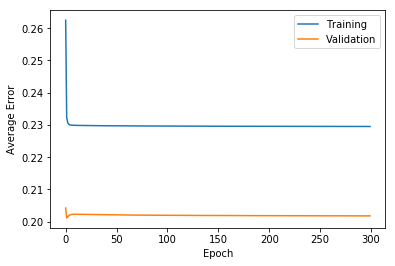

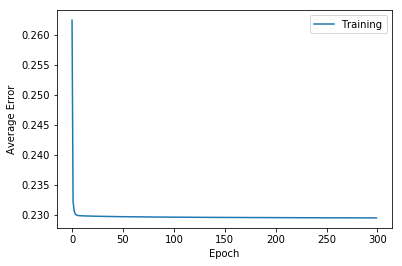

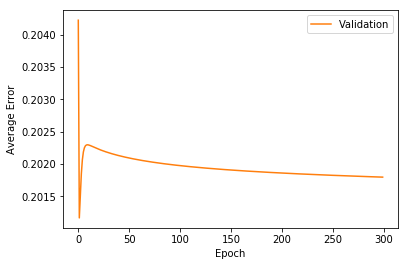

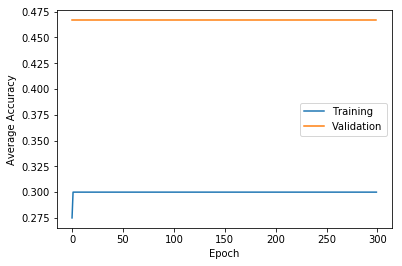

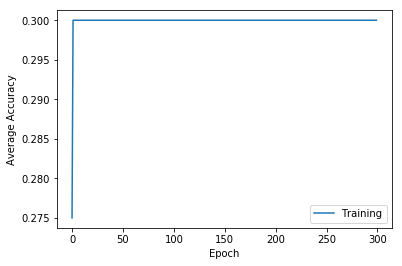

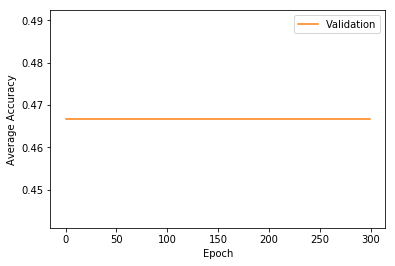

In [275]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(trainerror, label='Training')
plt.plot(valerror, label='Validation')
plt.ylabel('Average Error')
plt.xlabel('Epoch')
plt.legend()
plt.show

plt.figure(2)
plt.plot(trainerror, label='Training')
plt.ylabel('Average Error')
plt.xlabel('Epoch')
plt.legend()
plt.show

plt.figure(3)
plt.plot(valerror,color='#ff7f0e', label='Validation')
plt.ylabel('Average Error')
plt.xlabel('Epoch')
plt.legend()
plt.show

plt.figure(4)
plt.plot(trainacc, label='Training')
plt.plot(valacc, label='Validation')
plt.ylabel('Average Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show

plt.figure(5)
plt.plot(trainacc, label='Training')
plt.ylabel('Average Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show

plt.figure(6)
plt.plot(valacc, color='#ff7f0e', label='Validation')
plt.ylabel('Average Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show
